In [1]:
import warnings
warnings.filterwarnings(action='ignore')
%config Computer.use_jedi = False
import numpy as np
import pandas as pd
from geopy.distance import geodesic

In [2]:
house = pd.read_csv('./data/w동북부실거래가단지.csv')
house = house.drop(columns=['Unnamed: 0'], axis=1)
house

,시군구,단지명,위도,경도,행정동,건축년도,면적(㎡)당금액
0,강북구,FIRSTVIEW,37.647560,127.015220,수유2동,2010,638.0
1,강북구,경남아너스빌,37.638005,127.024225,수유3동,2005,804.0
2,강북구,경남아너스빌(1356-0),37.616356,127.035671,송중동,2003,1033.0
3,강북구,궁전,37.647272,127.012891,우이동,2003,438.0
4,강북구,극동,37.641791,127.012306,인수동,1992,696.0
...,...,...,...,...,...,...,...
783,중랑구,현대,37.575176,127.089222,면목7동,1994,892.0
784,중랑구,현대아이파크,37.610695,127.073480,묵2동,2002,976.0
785,중랑구,현대휴앤미(102동),37.603025,127.084498,중화1동,2007,697.0
786,중랑구,현대휴온,37.592240,127.078707,면목2동,2013,648.0


In [3]:
school = pd.read_csv('./data/w동북부학교.csv')
school = school.drop(columns=['Unnamed: 0'], axis=1)
school

,학교명,위도,경도,시군구
0,경동고등학교,37.586200,127.014664,성북구
1,경희고등학교,37.594912,127.054904,동대문구
2,경희여자고등학교,37.594927,127.051115,동대문구
3,계성고등학교,37.607710,127.020310,성북구
4,고려대학교사범대학부속고등학교,37.609816,127.001571,성북구
...,...,...,...,...
70,원묵고등학교,37.615506,127.086204,중랑구
71,삼각산고등학교,37.616287,127.020107,강북구
72,해성여자고등학교,37.580759,127.057155,동대문구
73,솔샘고등학교,37.624020,127.012109,강북구


In [4]:
# 1km 반경 내의 school 수를 찾기 위한 함수
def count_school_nearby(row):
    count = 0
    for _, school_row in school.iterrows():
        distance = geodesic((row['위도'], row['경도']), (school_row['위도'], school_row['경도'])).kilometers
        if distance <= 1.0:  # 원하는 반경 (1km) 설정
            count += 1
    return count

# house 데이터프레임에 'school_count' 열 추가
house['school_count'] = house.apply(count_school_nearby, axis=1)

# 결과 확인
house


,시군구,단지명,위도,경도,행정동,건축년도,면적(㎡)당금액,school_count
0,강북구,FIRSTVIEW,37.647560,127.015220,수유2동,2010,638.0,1
1,강북구,경남아너스빌,37.638005,127.024225,수유3동,2005,804.0,0
2,강북구,경남아너스빌(1356-0),37.616356,127.035671,송중동,2003,1033.0,3
3,강북구,궁전,37.647272,127.012891,우이동,2003,438.0,1
4,강북구,극동,37.641791,127.012306,인수동,1992,696.0,0
...,...,...,...,...,...,...,...,...
783,중랑구,현대,37.575176,127.089222,면목7동,1994,892.0,0
784,중랑구,현대아이파크,37.610695,127.073480,묵2동,2002,976.0,1
785,중랑구,현대휴앤미(102동),37.603025,127.084498,중화1동,2007,697.0,2
786,중랑구,현대휴온,37.592240,127.078707,면목2동,2013,648.0,0


In [5]:
academy = pd.read_csv('./data/w동북부학원.csv')
academy = academy.drop(columns=['Unnamed: 0'], axis=1)
academy

,시군구,행정동,경도,위도
0,강북구,삼각산동,127.021121,37.615690
1,노원구,중계1동,127.075667,37.650865
2,중랑구,중화1동,127.083394,37.602089
3,성북구,정릉1동,127.015953,37.603006
4,중랑구,신내1동,127.098794,37.603244
...,...,...,...,...
1119,노원구,중계본동,127.078171,37.650903
1120,도봉구,방학1동,127.046658,37.665772
1121,성북구,길음2동,127.024953,37.609343
1122,노원구,중계본동,127.077803,37.651296


In [6]:
# 1km 반경 내의 academy 수를 찾기 위한 함수
def count_academy_nearby(row):
    count = 0
    for _, academy_row in academy.iterrows():
        distance = geodesic((row['위도'], row['경도']), (academy_row['위도'], academy_row['경도'])).kilometers
        if distance <= 1.0:  # 원하는 반경 (1km) 설정
            count += 1
    return count

# house 데이터프레임에 'academy_count' 열 추가
house['academy_count'] = house.apply(count_academy_nearby, axis=1)

# 결과 확인
house

,시군구,단지명,위도,경도,행정동,건축년도,면적(㎡)당금액,school_count,academy_count
0,강북구,FIRSTVIEW,37.647560,127.015220,수유2동,2010,638.0,1,28
1,강북구,경남아너스빌,37.638005,127.024225,수유3동,2005,804.0,0,30
2,강북구,경남아너스빌(1356-0),37.616356,127.035671,송중동,2003,1033.0,3,34
3,강북구,궁전,37.647272,127.012891,우이동,2003,438.0,1,28
4,강북구,극동,37.641791,127.012306,인수동,1992,696.0,0,33
...,...,...,...,...,...,...,...,...,...
783,중랑구,현대,37.575176,127.089222,면목7동,1994,892.0,0,14
784,중랑구,현대아이파크,37.610695,127.073480,묵2동,2002,976.0,1,20
785,중랑구,현대휴앤미(102동),37.603025,127.084498,중화1동,2007,697.0,2,31
786,중랑구,현대휴온,37.592240,127.078707,면목2동,2013,648.0,0,10


In [7]:
house[house['행정동'] == '중계본동']

,시군구,단지명,위도,경도,행정동,건축년도,면적(㎡)당금액,school_count,academy_count
81,노원구,금호타운(583),37.646819,127.081870,중계본동,1997,929.0,5,173
92,노원구,대림벽산(363),37.647839,127.078368,중계본동,1993,964.0,6,180
103,노원구,동진,37.652306,127.082191,중계본동,1988,702.0,6,180
106,노원구,라이프,37.651108,127.079599,중계본동,1993,1251.0,5,183
126,노원구,삼성,37.648587,127.084144,중계본동,1999,1030.0,4,172
186,노원구,신동아(366),37.651108,127.079599,중계본동,1993,957.0,5,183
190,노원구,신안동진,37.649587,127.078913,중계본동,1993,1465.0,5,182
213,노원구,주공6,37.648664,127.077598,중계본동,1993,1294.0,7,180
214,노원구,주공7,37.647024,127.079949,중계본동,1993,1179.0,5,180
227,노원구,청구(366),37.651108,127.079599,중계본동,1993,1287.0,5,183


In [8]:
house[house['행정동'] == '수유3동']

,시군구,단지명,위도,경도,행정동,건축년도,면적(㎡)당금액,school_count,academy_count
1,강북구,경남아너스빌,37.638005,127.024225,수유3동,2005,804.0,0,30
41,강북구,예도팔라티움,37.638549,127.023087,수유3동,2020,1405.0,0,31
43,강북구,우암센스뷰,37.637802,127.024012,수유3동,2005,655.0,0,30
49,강북구,진명,37.643110,127.024864,수유3동,2004,452.0,0,39
50,강북구,칸타빌수유팰리스,37.642179,127.025494,수유3동,2022,1130.0,0,37


In [9]:
subway = pd.read_csv('/data/지하철위도경도.csv')
subway = subway.drop(columns=['Unnamed: 0'], axis=1)
subway

,역한글명칭,경도,위도
0,삼성중앙,127.053282,37.513011
1,사평,127.015259,37.504206
2,구반포,126.987332,37.501364
3,흑석(중앙대입구),126.963708,37.508770
4,샛강,126.928422,37.517274
...,...,...,...
760,관악산(서울대),126.945064,37.469102
761,신논현,127.025060,37.504598
762,탕정,127.084850,36.788660
763,신사,127.020114,37.516334


In [10]:
# 1km 반경 내의 subway 수를 찾기 위한 함수
def count_subway_nearby(row):
    count = 0
    for _, subway_row in subway.iterrows():
        distance = geodesic((row['위도'], row['경도']), (subway_row['위도'], subway_row['경도'])).kilometers
        if distance <= 1.0:  # 원하는 반경 (1km) 설정
            count += 1
    return count

# house 데이터프레임에 'subway_count' 열 추가
house['subway_count'] = house.apply(count_subway_nearby, axis=1)

# 결과 확인
house

,시군구,단지명,위도,경도,행정동,건축년도,면적(㎡)당금액,school_count,academy_count,subway_count
0,강북구,FIRSTVIEW,37.647560,127.015220,수유2동,2010,638.0,1,28,3
1,강북구,경남아너스빌,37.638005,127.024225,수유3동,2005,804.0,0,30,3
2,강북구,경남아너스빌(1356-0),37.616356,127.035671,송중동,2003,1033.0,3,34,1
3,강북구,궁전,37.647272,127.012891,우이동,2003,438.0,1,28,3
4,강북구,극동,37.641791,127.012306,인수동,1992,696.0,0,33,3
...,...,...,...,...,...,...,...,...,...,...
783,중랑구,현대,37.575176,127.089222,면목7동,1994,892.0,0,14,2
784,중랑구,현대아이파크,37.610695,127.073480,묵2동,2002,976.0,1,20,5
785,중랑구,현대휴앤미(102동),37.603025,127.084498,중화1동,2007,697.0,2,31,4
786,중랑구,현대휴온,37.592240,127.078707,면목2동,2013,648.0,0,10,4


In [23]:
house.to_csv('./data/학습데이터_1.csv')
house

,year,price,school_count,academy_count,subway_count
0,2010,638.0,1,28,3
1,2005,804.0,0,30,3
2,2003,1033.0,3,34,1
3,2003,438.0,1,28,3
4,1992,696.0,0,33,3
...,...,...,...,...,...
783,1994,892.0,0,14,2
784,2002,976.0,1,20,5
785,2007,697.0,2,31,4
786,2013,648.0,0,10,4


In [11]:
df = house
df

,시군구,단지명,위도,경도,행정동,건축년도,면적(㎡)당금액,school_count,academy_count,subway_count
0,강북구,FIRSTVIEW,37.647560,127.015220,수유2동,2010,638.0,1,28,3
1,강북구,경남아너스빌,37.638005,127.024225,수유3동,2005,804.0,0,30,3
2,강북구,경남아너스빌(1356-0),37.616356,127.035671,송중동,2003,1033.0,3,34,1
3,강북구,궁전,37.647272,127.012891,우이동,2003,438.0,1,28,3
4,강북구,극동,37.641791,127.012306,인수동,1992,696.0,0,33,3
...,...,...,...,...,...,...,...,...,...,...
783,중랑구,현대,37.575176,127.089222,면목7동,1994,892.0,0,14,2
784,중랑구,현대아이파크,37.610695,127.073480,묵2동,2002,976.0,1,20,5
785,중랑구,현대휴앤미(102동),37.603025,127.084498,중화1동,2007,697.0,2,31,4
786,중랑구,현대휴온,37.592240,127.078707,면목2동,2013,648.0,0,10,4


In [12]:
df.columns

Index(['시군구', '단지명', '위도', '경도', '행정동', '건축년도', '면적(㎡)당금액', 'school_count',
       'academy_count', 'subway_count'],
      dtype='object')

In [13]:
df.drop(columns=['시군구', '단지명', '위도', '경도', '행정동'], inplace=True)
df

,건축년도,면적(㎡)당금액,school_count,academy_count,subway_count
0,2010,638.0,1,28,3
1,2005,804.0,0,30,3
2,2003,1033.0,3,34,1
3,2003,438.0,1,28,3
4,1992,696.0,0,33,3
...,...,...,...,...,...
783,1994,892.0,0,14,2
784,2002,976.0,1,20,5
785,2007,697.0,2,31,4
786,2013,648.0,0,10,4


In [14]:
new_column_names = {
    '건축년도': 'year',
    '면적(㎡)당금액': 'price',
}
df.rename(columns=new_column_names, inplace=True)
df

,year,price,school_count,academy_count,subway_count
0,2010,638.0,1,28,3
1,2005,804.0,0,30,3
2,2003,1033.0,3,34,1
3,2003,438.0,1,28,3
4,1992,696.0,0,33,3
...,...,...,...,...,...
783,1994,892.0,0,14,2
784,2002,976.0,1,20,5
785,2007,697.0,2,31,4
786,2013,648.0,0,10,4


In [15]:
# 'year' 열을 뒤로 이동
df = df[['price'] + [col for col in df if col != 'price' and col != 'year'] + ['year']]

# 데이터프레임 출력
df

,price,school_count,academy_count,subway_count,year
0,638.0,1,28,3,2010
1,804.0,0,30,3,2005
2,1033.0,3,34,1,2003
3,438.0,1,28,3,2003
4,696.0,0,33,3,1992
...,...,...,...,...,...
783,892.0,0,14,2,1994
784,976.0,1,20,5,2002
785,697.0,2,31,4,2007
786,648.0,0,10,4,2013


In [16]:
df.columns

Index(['price', 'school_count', 'academy_count', 'subway_count', 'year'], dtype='object')

In [17]:
X1 = df.school_count.values
X2 = df.academy_count.values
X3 = df.subway_count.values
X4 = df.year.values
Y = df.price.values

In [18]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'D2Coding'
plt.rcParams['font.size'] = 15

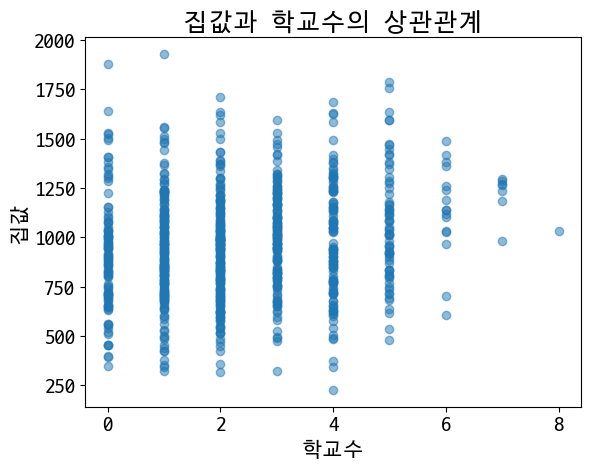

In [19]:
plt.scatter(X1, Y, alpha=0.5)
plt.title('집값과 학교수의 상관관계')
plt.xlabel('학교수')
plt.ylabel('집값')
plt.show()

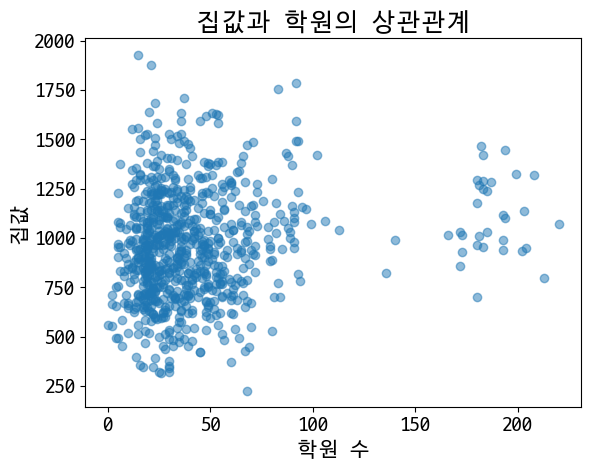

In [20]:
plt.scatter(X2, Y, alpha=0.5)
plt.title('집값과 학원의 상관관계')
plt.xlabel('학원 수')
plt.ylabel('집값')
plt.show()

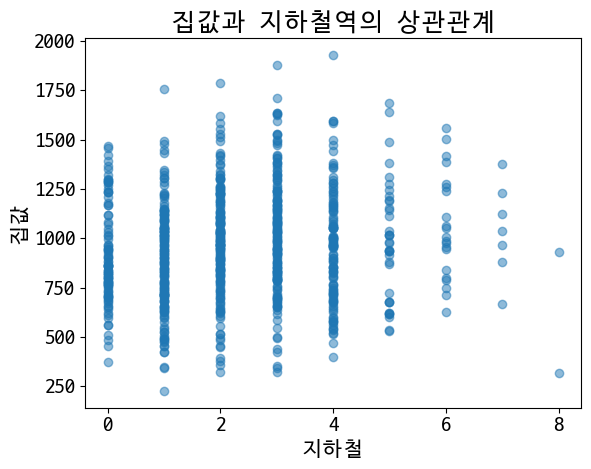

In [21]:
plt.scatter(X3, Y, alpha=0.5)
plt.title('집값과 지하철역의 상관관계')
plt.xlabel('지하철')
plt.ylabel('집값')
plt.show()

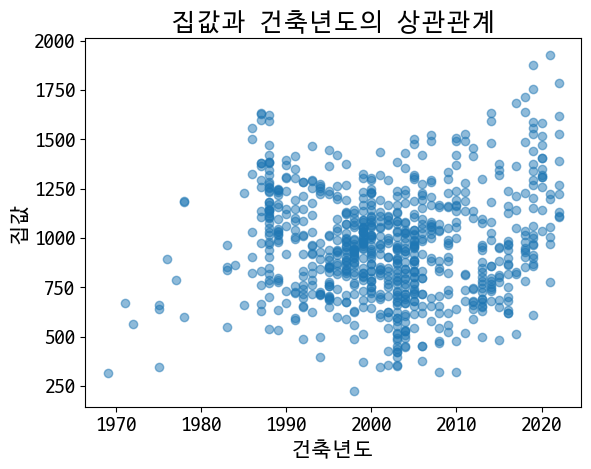

In [22]:
plt.scatter(X4, Y, alpha=0.5)
plt.title('집값과 건축년도의 상관관계')
plt.xlabel('건축년도')
plt.ylabel('집값')
plt.show()

In [24]:
from sklearn.model_selection import train_test_split # 트레이닝, 테스트 데이터 분할을 위해 import 한다.
from sklearn.preprocessing import StandardScaler # 스케일링을 위한 import

In [25]:
data = df
data

,price,school_count,academy_count,subway_count,year
0,638.0,1,28,3,2010
1,804.0,0,30,3,2005
2,1033.0,3,34,1,2003
3,438.0,1,28,3,2003
4,696.0,0,33,3,1992
...,...,...,...,...,...
783,892.0,0,14,2,1994
784,976.0,1,20,5,2002
785,697.0,2,31,4,2007
786,648.0,0,10,4,2013
